In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

from sir_model import *

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


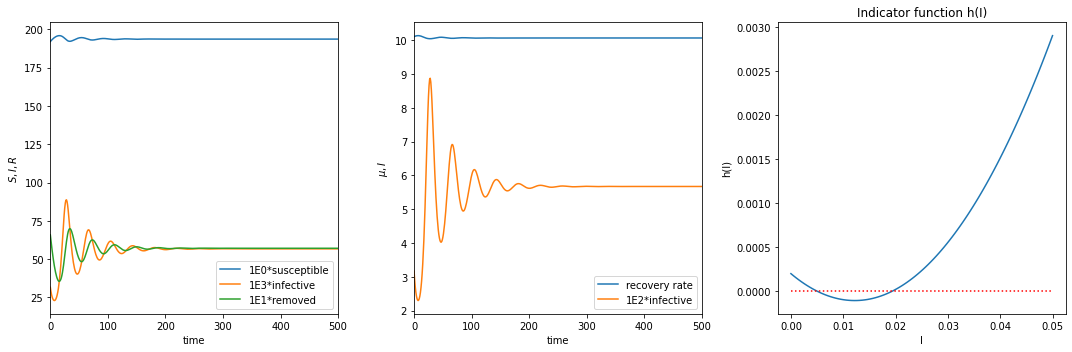

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5

A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))

# draw time - SIR plot
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

# draw time - \mu,I plot
ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

# draw I - h(I) plot
I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

In [3]:
def simulate(initial_point, b, beta):
    """
    simulate and plot SIR

    Parameters:
    -----------
    initial_point
        initial points of the trajectory
    b
        hospital beds per 10,000 persons
    beta
        average number of adequate contacts per unit time with infectious individuals
    """
    cmap = ["BuPu", "Purples", "bwr"] 
    time = np.linspace(t_0, 15000, NT)
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=initial_point, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    fig=plt.figure(figsize=(5,5));
    ax=fig.add_subplot(111,projection="3d");
    ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, cmap=cmap[0]);
    
    ax.set_xlabel("S")
    ax.set_ylabel("I")
    ax.set_zlabel("R")

    ax.set_title(f"SIR trajectory b = {each_b/1000}") 
    fig.tight_layout()

In [4]:
import matplotlib
matplotlib.interactive(True)
%matplotlib notebook

# initial points
SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
SIM1 = [195.7, 0.03, 3.92]
SIM2 = [193, 0.08, 6.21]

initial_point_options = [SIM0, SIM1, SIM2]

# get input
selection = int(input('For which initial points will the simulation run?\n1-(195.3, 0.052, 4.4)\n2-(195.7, 0.03, 3.92)\n3-(193, 0.08, 6.21)\n')) - 1
which_model = int(input('Run simulations for the task or the bonus?\n1- Task\n2- Bonus\n'))

# set parameters
b_range = range(10, 30)
beta = 11.5

if which_model == 2:
    b_range = range(50, 75)
    beta = 11.9

# simulate for a set of parameter combinations
for each_b in b_range: # to vary b between [0.1, 0.3]
    simulate(initial_point_options[selection], each_b/1000, beta=beta)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\User\AppData\Local\Temp\ipykernel_224\4203225025.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New notebook

beta = 11.9 \\\\
b in [50, 75] \\\\
init point: SIM0